In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data=data.drop(['CustomerID', 'Genre'],axis=1)
data=data.rename(columns={
 'Annual Income (k$)':'Income',
 'Spending Score (1–100)':'Spend_Score'})

In [3]:
data.head()

,Age,Income,Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Isolation forest

In [9]:
from sklearn.ensemble import IsolationForest

rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1).fit(data)

C:\Edu\ML\lnu-ml\Practice\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [10]:
clf.predict(data)

array([-1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [14]:
if_predictions=clf.predict(data)
if_predictions=pd.Series(if_predictions).replace([-1,1],[1,0])
if_anomalies=data[if_predictions==1];
if_normal=data[if_predictions==0];

In [15]:
if_scores = clf.decision_function(data)

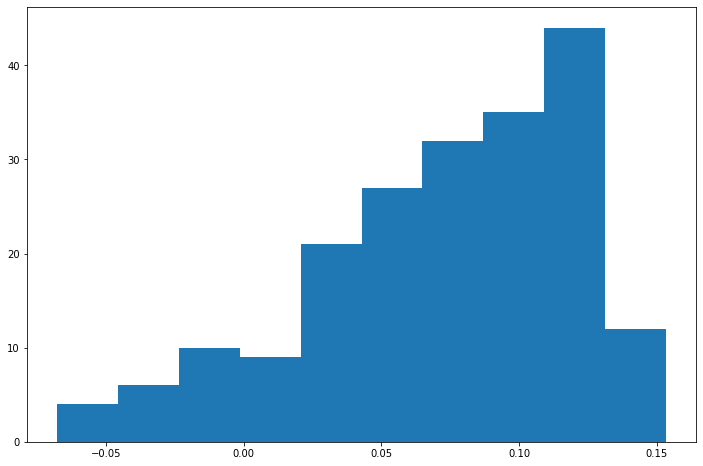

In [16]:
plt.figure(figsize=(12,8))
plt.hist(if_scores);

Text(0.5, 1.0, 'Isolation Forests - Anomalies')

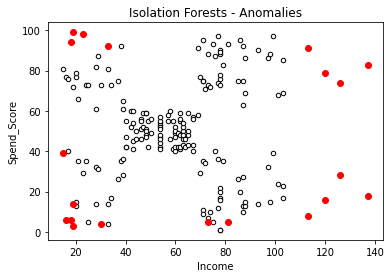

In [33]:
plt.scatter(if_normal.iloc[:,1],if_normal.iloc[:,2],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.iloc[:,1],if_anomalies.iloc[:,2],c='red')
plt.xlabel('Income')
plt.ylabel('Spend_Score')
plt.title('Isolation Forests - Anomalies')

# One-Class SVM

In [27]:
from sklearn import svm
clf=svm.OneClassSVM(nu=.2,kernel='rbf',gamma=.001).fit(data)

In [28]:
oc_predictions=clf.predict(data)
oc_predictions=pd.Series(oc_predictions).replace([-1,1],[1,0])
oc_anomalies=data[oc_predictions==1];
oc_normal=data[oc_predictions==0];

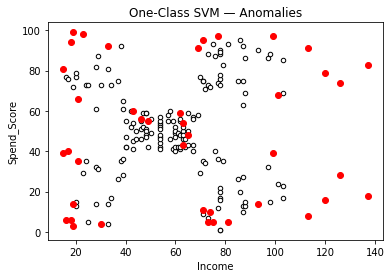

In [34]:
plt.scatter(oc_normal.iloc[:,1],oc_normal.iloc[:,2],c='white',s=20,edgecolor='k')
plt.scatter(oc_anomalies.iloc[:,1],oc_anomalies.iloc[:,2],c='red')
plt.xlabel('Income')
plt.ylabel('Spend_Score')
plt.title('One-Class SVM — Anomalies');

# Local outlier factor

In [35]:
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

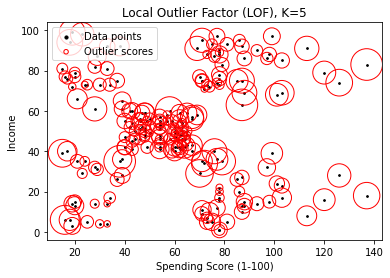

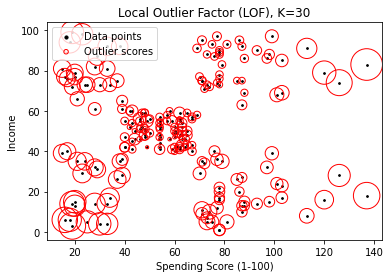

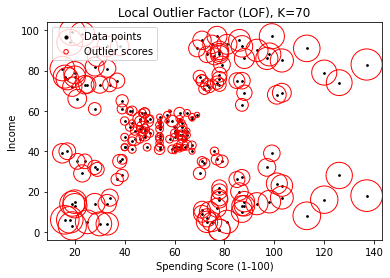

In [39]:
def LOF_plot(k):
    var1,var2=1,2
    clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
    y_pred = clf.fit_predict(data)
    LOF_Scores = clf.negative_outlier_factor_

    plt.title('Local Outlier Factor (LOF), K={}'.format(k))
    plt.scatter(data.iloc[:, var1], data.iloc[:, var2], color='k', s=3., label='Data points')
    radius = (LOF_Scores.max()-LOF_Scores) / (LOF_Scores.max()-LOF_Scores.min())
    plt.scatter(data.iloc[:, var1], data.iloc[:, var2], s=1000 * radius, edgecolors='r',
    facecolors='none', label='Outlier scores')
    plt.axis('tight')
    plt.ylabel('{}'.format(data.columns[var1]))
    plt.xlabel('{}'.format(data.columns[var2]))
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.show();
LOF_plot(5)
LOF_plot(30)
LOF_plot(70)